# Multi-class Image Classification with Transfer Learning and TensorFlow

## Introduction 

You are walking down the street and you meet a four legged stranger...

In [1]:
# Load image
from IPython.display import Image
from IPython.core.display import HTML 
# Image(url= "https://www.hdwallpaper.nu/wp-content/uploads/2015/03/Long-Haired-Golden-Retriever.jpg", unconfined=True)

# Uncomment the remaining lines of code for a smaller image
html1 = '<img src="https://www.hdwallpaper.nu/wp-content/uploads/2015/03/Long-Haired-Golden-Retriever.jpg" width="460" height="360" align="center"/>'
HTML(html1)

"Sooooo Cute!" <br>
"What's their name?" <br>
"How old are they?" <br>
<br>

Like some people, you may also ask, "what kind of breed is that?" <br>  

But, there will always be someone other than the owner who knows that our little friend is a golden retriever. 
<br> <br>

How do they know that? Answering this question is the purpose of this notebook. <br> <br>  

To do this, I will use data from Kaggle which has over 10,000 labelled images of 120 different dog breeds. This is multi-class image classification as we are classifying multiple dog breeds from images.

For the model, I will be using a pretrained model from TensorFlow Hub. This is transfer learning, which leverages the parallelism between this dataset and a model that has been trained to classify images.


## Data

Import data

In [2]:
!wget https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip # download files from Dropbox as zip

import os
import zipfile

local_zip = 'dog-breed-identification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('Dog Vision') # unzip the files into a file called "Dog Vision"
zip_ref.close()

--2020-11-28 02:24:00--  https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9kjr0ui9qbodfao/dog-breed-identification.zip [following]
--2020-11-28 02:24:00--  https://www.dropbox.com/s/raw/9kjr0ui9qbodfao/dog-breed-identification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd666089a4093266c901f688deb.dl.dropboxusercontent.com/cd/0/inline/BECn0nZI1Y53QriqIGrI6c9Uxo3kcg_mxFrrmMZhuvSIgs43_2aFiqYlbDLWpgXhk6NmZkUYZ82FZk-EHYz_qjAC8czyAEwIfQyq-tilVocnCUKW7nbCctSArNIXqW3NOCA/file# [following]
--2020-11-28 02:24:00--  https://ucd666089a4093266c901f688deb.dl.dropboxusercontent.com/cd/0/inline/BECn0nZI1Y53QriqIGrI6c9Uxo3kcg_mxFrrmMZhuvSIgs43_2aFiqYlbDLWpgXhk6

Check the data labels

The labels.csv file assumes that there are 120 unique dog breeds and 10222 images. The label with the fewest number of images is acceptable since there are over 60 images. A golden standard based on the Google Cloud Platform is 10 images.

In [3]:
import pandas as pd

labels = pd.read_csv("Dog Vision/labels.csv")

print(labels.describe())
print(labels.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     79bf450241ac44efcb4b41220275fbc9  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


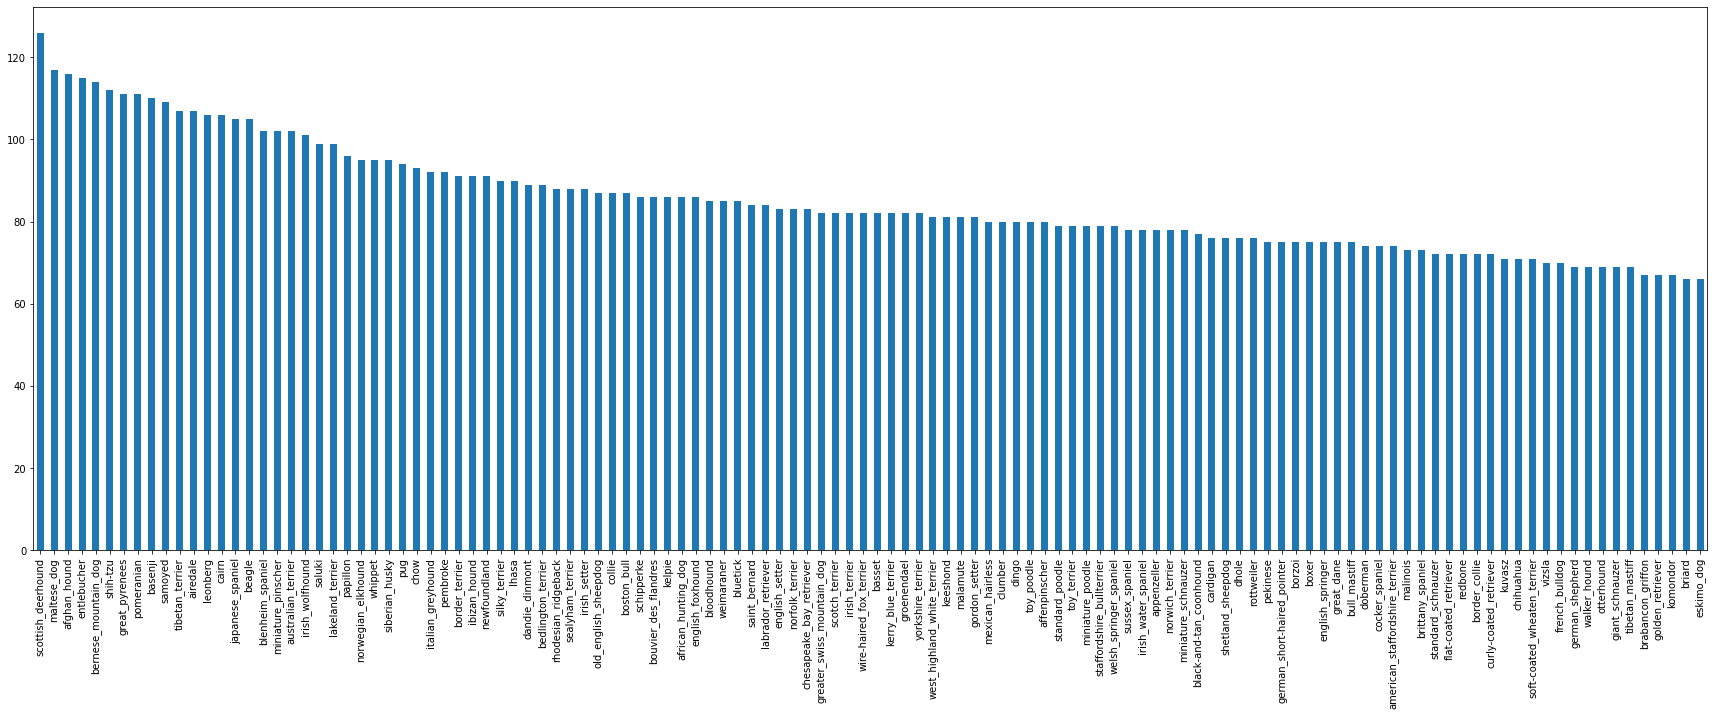

In [4]:
import matplotlib.pyplot as plt

labels.breed.value_counts().plot.bar(figsize = (30, 10))
plt.show()

We still need to compare the number of images and the number of labels to see that is one-to-one.

In [5]:
# Turn the dataframe into a NumPy array
import numpy as np
label = labels.breed.to_numpy()
label[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [6]:
# List every image as a string describing its path
imageNames = ["Dog Vision/train/" + name + ".jpg" for name in labels.id]
imageNames[:15]

['Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'Dog Vision/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'Dog Vision/train/0075dc49dab4024d12fafe67074d8a81.jpg']

In [7]:
# Take the ratio between the number of images to the number of labels
len(imageNames) / len(label)

1.0

In [8]:
totalBreeds = np.unique(label)

# Number of bars in the plot above
len(totalBreeds)

120

In [14]:
# Turn labels into array of bools
boolLabels = [name == np.array(totalBreeds) for name in label]

A True in the array means that the the label identifies the image as the dog breed in the respective index. The rest of the array would be False.

### Train test split to create a validation dataset

In [18]:
X = imageNames
y = boolLabels

# Choose the number of images with a slider, starting small is best practice since training takes a long time
IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:IMAGES], y[:IMAGES], test_size = 0.2, random_state = 69)

# Check dimensions
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

As always, we want to work with numbers so this array must be converted into an array of integers but in this case matching and not matching is binary. A 1 would be a match while a 0 is not a match across all the features. We can map the index of the max value, the 1, to the same index in the labels list of dog breeds.

### Preprocessing images with TensorFlow 2.0 to turn the data into tensors

In [ ]:
# Import TF 2.x if it is not defaulted on Colab
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

Check if TensorFlow and the Hub are available

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Runtime > Change runtime type > Hardware Accelerator > GPU
print("GPU available!" if tf.config.list_physical_devices("GPU") else "not available :(")

In [ ]:
imageSize = 224